# Mixture Modelling

### Generative model
* sample mixture proportions: $\pi \sim \text{Dir}(1, 1, 1)$
* sample means: $\mu_k \sim \text{MVN}(0, 10 I_2)$, $k = 1..3$
* for each point $i = 1..N$:
    * assign point to gaussian: $z_i \sim \text{Cat}(\pi)$
    * sample point from gaussian $x_i \sim \text{MVN}(\mu_{z_i}, I_2)$

### Graphical model
![graphical_model](images/graphical_model.png)

### Joint distribution
$p(\pi, z, x, \mu) = p(\pi)  \left[ \prod_{k=1}^K p(\mu_k) \right]  \left[ \prod_{i=1}^N p(x_i | \mu_{z_i}, z_i) p(z_i | \pi) \right]$

### Conditional independencies
$x_i \perp\!\!\!\perp x_j | \pi, (\mu_{z_i} \text{ if } z_i = z_j)$

# Gibbs sampling
$(\pi | z) \sim \text{Dir}(\alpha_k = 1 + n_k)$ <br><br>
$n_k = \sum_{i=1}^N 1\{z_i = k\}$
> $p(\pi | z) \propto p(\pi) p(z | \pi)$
>
> $\propto p(\pi) \prod_{i=1}^N p(z_i | \pi)$
>> $\pi \sim \text{Dir}(1, 1, 1) \to p(\pi) \propto \prod_{k=1}^K \pi^{\alpha_k - 1}$
>
> $\propto \prod_{k=1}^K \pi^{\alpha_k - 1} \prod_{i=1}^N \pi_{z_i}$
>> $\text{let } n_k = \sum_{i=1}^N 1\{z_i = k\}$
>
> $\propto \prod_{k=1}^K \pi^{(\alpha_k + n_k) - 1}$

$(z_i | \pi, x_i, \mu) \sim \text{Cat}(\pi')$ <br><br>
$\pi_{k}' = l_k / \sum_{k=1}^K l_k, \: l_k = \pi_k \exp(-\frac{1}{2} ||x_i - \mu_k||^2)$
> $p(z_i = k | \pi, x_i, \mu) \propto p(x_i | \mu_k) p(z_i | \pi)$
>
> $\propto \exp(-\frac{1}{2} ||x_i - \mu_k||^2) \: \pi_k$
>> $\text{let } l_k = \pi_k \exp(-\frac{1}{2} ||x_i - \mu_k||^2)$
>
> $\pi_{k}' = l_k / \sum_{k=1}^K l_k$

$(\mu_k | x, z) \sim \text{MVN}(\mu_k' = S_k / (\frac{1}{10} + n_k), \: \Sigma_k' = 1 / (\frac{1}{10} + n_k))$ <br><br>
$n_k = \sum_{i=1}^N 1\{z_i = k\}, \: S_k = \sum_{z_i=k} x_i$
> $p(\mu_k | x, z) \propto p(\mu_k) \left[ \prod_{i=1}^N p(x_i | \mu_k) \: 1\{z_i = k\} \right]$
>
> $\propto \exp(-\frac{1}{2} ||\mu_k||^2 \frac{1}{10}) \left[ \prod_{i=1}^N \exp(-\frac{1}{2} ||x_i - \mu_k||^2) \: 1\{z_i = k\} \right]$
>
> $\propto \exp \left [ -\frac{1}{2} ||\mu_k||^2 \frac{1}{10} + \sum_{i=1}^N -\frac{1}{2} ||x_i - \mu_k||^2 \: 1\{z_i = k\} \right]$
>
> $\propto \exp \left [ -\frac{1}{2} (||\mu_k||^2 \frac{1}{10} + \sum_{i=1}^N ||x_i - \mu_k||^2 \: 1\{z_i = k\}) \right]$
>
> $\propto \exp \left [ -\frac{1}{2} (||\mu_k||^2 \frac{1}{10} + \sum_{z_i=k} \left[ ||x_i||^2 - 2 \mu_k^T x_i + ||\mu_k||^2 \right]) \right]$
>
> $\propto \exp \left [ -\frac{1}{2} (||\mu_k||^2 (\frac{1}{10} + \sum_{i=1}^N 1\{z_i = k\}) + \sum_{z_i=k} ||x_i||^2 - 2 \mu_k^T \sum_{z_i=k} x_i) \right]$
>> $\text{let } n_k = \sum_{i=1}^N 1\{z_i = k\}, \: S_k = \sum_{z_i=k} x_i$
>>
>> $\text{Note that } \sum_{z_i=k} ||x_i||^2 \text{ is constant wrt } \mu_k$
>
> $\propto \exp \left [ -\frac{1}{2} (||\mu_k||^2 (\frac{1}{10} + n_k) - 2 \mu_k^T S_k) \right]$
>
> $\propto \exp \left [ -\frac{1}{2} (||\mu_k||^2 - 2 \mu_k^T \frac{S_k}{\frac{1}{10} + n_k}) (\frac{1}{10} + n_k) \right]$
>
> $\mu_k' = S_k / (\frac{1}{10} + n_k), \: \Sigma_k' = 1 / (\frac{1}{10} + n_k)$

### Algorithm
$\text{Initialize:}$ <br>
$\pi \sim \text{Dir}(1, 1, 1)$ <br><br>
$\mu_k \sim \text{MVN}(0, 10 I_2)$, $k = 1..3$ <br><br>
$z_i \sim \text{Cat}(\pi)$, $i = 1..N$ <br>

$\text{Sample:}$ <br>
$(z_i | \pi, x_i, \mu) \sim \text{Cat}(\pi')$ <br>
$\pi_{k}' = l_k / \sum_{k=1}^K l_k, \: l_k = \pi_k \exp(-\frac{1}{2} ||x_i - \mu_k||^2)$ <br><br>

$(\pi | z) \sim \text{Dir}(\alpha_k = 1 + n_k)$ <br>
$n_k = \sum_{i=1}^N 1\{z_i = k\}$ <br><br>

$(\mu_k | x, z) \sim \text{MVN}(\mu_k' = S_k / (\frac{1}{10} + n_k), \: \Sigma_k' = 1 / (\frac{1}{10} + n_k))$ <br>
$n_k = \sum_{i=1}^N 1\{z_i = k\}, \: S_k = \sum_{z_i=k} x_i$ <br><br>

$\text{Track: } p(\pi, z, x, \mu) = p(\pi)  \left[ \prod_{k=1}^K p(\mu_k) \right]  \left[ \prod_{i=1}^N p(x_i | \mu_{z_i}, z_i) p(z_i | \pi) \right]$

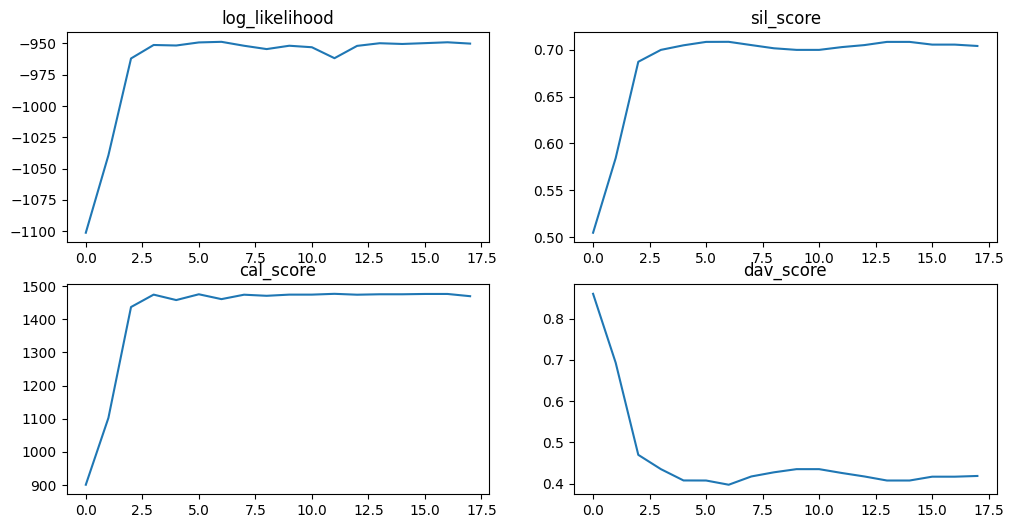

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from matplotlib.animation import ArtistAnimation
from scipy.stats import dirichlet, multivariate_normal
from IPython.display import HTML

# Data.
with open("data/hw1_250.txt", "r") as f:
    x = np.array([[float(i) for i in line.split()] for line in f.read().split("\n") if line])

# Init.
N = len(x)
K = 3

pi_prior = dirichlet(alpha=[1, 1, 1])
pi = pi_prior.rvs()[0]

z = np.random.choice(a=np.arange(K), size=N, p=pi)

mu_prior = multivariate_normal(mean=[0, 0], cov=10)
mu = mu_prior.rvs(size=K)

K_COLORS = ["red", "green", "blue"]
def plot_clusters(x, z, mu, ax):
    frame = []
    for k in range(K):
        mask = z == k
        frame.append(ax.scatter(x[mask, 0], x[mask, 1], c=K_COLORS[k], alpha=0.8))
    for k in range(K):
        frame.append(ax.scatter(mu[k, 0], mu[k, 1], c=K_COLORS[k], marker="^", s=200, linewidths=3, edgecolor="black"))
    return frame

class EarlyStopping:
    """Early stopping with patience on a min criterion."""
    def __init__(self, patience: int, min_delta: float = 1e-6):
        self.patience = patience
        self.min_delta = min_delta
        self.min_val = float("inf")
        self.steps_since_min = 0

    def update(self, val: float) -> None:
        if (self.min_val - val) > self.min_delta:
            self.min_val = val
            self.steps_since_min = 0
            return
        self.steps_since_min += 1
    
    def converged(self) -> bool:
        return self.steps_since_min > self.patience
    
class MetricsLogger:
    """Metrics logger and plotter."""
    def __init__(self):
        self.metrics = {}
    
    def log(self, step_metrics: dict[str, float]) -> None:
        for k, v in step_metrics.items():
            if k not in self.metrics:
                self.metrics[k] = []
            self.metrics[k].append(v)

    def plot(self) -> None:
        nrows = math.ceil(len(self.metrics) / 2)
        fig, axs = plt.subplots(ncols=2, nrows=nrows, figsize=(12, nrows * 3))
        for ax, (k, v) in zip(axs.flat, self.metrics.items()):
            ax.plot(v)
            ax.set_title(k)
        plt.show()

    
def eval_clusters(X: np.ndarray, labels: np.ndarray) -> dict[str, float]:
    # https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
    sil_score = sklearn.metrics.silhouette_score(X, labels, metric="euclidean")
    cal_score = sklearn.metrics.calinski_harabasz_score(X, labels)
    dav_score = sklearn.metrics.davies_bouldin_score(X, labels)
    return {"sil_score": sil_score, "cal_score": cal_score, "dav_score": dav_score}


# Sample.
fig, ax = plt.subplots()
frames = []
early_stopping = EarlyStopping(patience=10)
metrics = MetricsLogger()

while (not early_stopping.converged()):
    frames.append(plot_clusters(x, z, mu, ax))

    # z.
    dist = ((x - mu[:, None, :]) ** 2).sum(axis=-1)
    unnorm_p = pi[:, None] * np.exp(-0.5 * dist)
    p = unnorm_p / unnorm_p.sum(axis=0)

    cum_probs = np.cumsum(p, axis=0)
    rand = np.random.random(cum_probs.shape[1])
    z = (rand >= cum_probs).sum(axis=0)

    # pi
    n = (z[:, None] == np.arange(K)).sum(axis=0)
    pi = np.random.dirichlet(n + 1)

    # mu
    empirical_mean = np.array([x[z == k].sum(axis=0) for k in range(K)])
    mu_new = empirical_mean / (0.1 + n[:, None])
    sigma_new = 1 / (0.1 + n)
    mu = np.array([multivariate_normal.rvs(mean=mu_new[k], cov=sigma_new[k]) for k in range(K)])

    # calc log prob of data
    lp_pi = pi_prior.logpdf(pi)
    lp_mu = mu_prior.logpdf(mu).sum()
    lp_z = np.log(pi)[z].sum()

    lp_x = sum(multivariate_normal.logpdf(x[z == k], mean=mu[k], cov=1).sum() for k in range(K))
    lp_data = lp_pi + lp_mu + lp_z + lp_x

    # log metrics.
    step_metrics = {"log_likelihood": lp_data}
    step_metrics.update(eval_clusters(x, z))
    metrics.log(step_metrics)
    early_stopping.update(-lp_data)

frames.append(plot_clusters(x, z, mu, ax))
anim = ArtistAnimation(fig, frames, interval=300, blit=True)
display(HTML(anim.to_jshtml()))
plt.close(fig)

metrics.plot()

# Mean Field Variational Inference

$\text{mean field family: }$ <br>
$q(\pi, z, \mu | \gamma, \phi, m) = q(\pi | \gamma) \left[ \prod_{i=1}^N q(z_i | \phi_i) \right] \left[ \prod_{k=1}^K q(\mu_k | m_k) \right]$ <br><br>

$q(\pi) = \text{Dir}(\gamma)$ <br>
$q(z_i) = \text{Cat}(\phi_i)$ <br>
$q(\mu_k) = \text{MVN}(\mu = m_k, \Sigma = 10 I_2)$ <br><br>

$\text{mean field update: } q_j^*(z) \propto \exp(\mathbb{E}_{-j} \log p({z_j} | x, z_{-j}))$

$\gamma_k = 1 + \sum_{i=1}^N \phi_{ik}$
> $q^*(\pi) \propto \exp(\mathbb{E_q} \log p(\pi | z))$
>
> $\propto \exp(\mathbb{E_q} \left[ \log p(\pi) + \log p(z | \pi) \right])$
>
> $\propto p(\pi) \exp(\mathbb{E_q} \left[ \sum_{i=1}^N \log \pi_{z_i} \right])$
>
> $\propto p(\pi) \exp(\sum_{k=1}^K \sum_{i=1}^N q(z_i = k) \log \pi_k))$
>
> $\propto p(\pi) \exp(\sum_{k=1}^K \sum_{i=1}^N \phi_{ik} \log \pi_k))$
>
> $\propto \left[ \prod_{k=1}^K \pi_k^{\alpha_k - 1} \right] \exp(\sum_{k=1}^K \log \pi_k^{\sum_{i=1}^N \phi_{ik}})$
>
> $\propto \prod_{k=1}^K \pi_k^{\alpha_k - 1} \pi_k^{\sum_{i=1}^N \phi_{ik}}$
>
> $\propto \prod_{k=1}^K \pi_k^{\alpha_k + \sum_{i=1}^N \phi_{ik} - 1}$
>
> $q^*(\pi) = \text{Dir}(\gamma_k = 1 + \sum_{i=1}^N \phi_{ik})$

$\phi_{ik} = \exp(l_{ik}) / \sum_{k'=1}^K \exp(l_{ik'})$ <br><br>
$l_{ik} = \psi(\gamma_k) -\frac{1}{2} ||x_i - m_k||^2$
> $q^*(z_i = k) \propto \exp(\mathbb{E_q} \log p(z_i | \pi, x_i, \mu))$
>
> $\propto \exp(\mathbb{E_q} \log p(x_i | z_i, \mu) p(z_i | \pi))$
> 
> $\propto \exp(\mathbb{E_q} \left[ -\frac{1}{2} ||x_i - \mu_k||^2 + \log \pi_k \right])$
>> $\mathbb{E_q} \log \pi_k = \psi(\gamma_k) - \psi(\sum_{k'=1}^K \gamma_{k'}), \: \psi = \text{digamma}.$  (see https://en.wikipedia.org/wiki/Dirichlet_distribution)
>>
>> $\mathbb{E_q} \left[ -\frac{1}{2} ||x_i - \mu_k||^2 \right]= -\frac{1}{2} ||x_i - m_k||^2$
>>
>>> $\mathbb{E_\mu} \left[ (x - \mu^2) \right] = \mathbb{E_\mu} \left[ x^2 - 2 x \mu - \mu^2) \right] = x^2 - 2x \mathbb{E}[\mu] + \mathbb{E}[\mu^2] = x^2 - 2x \text{Mean}[\mu] + \text{Var}[\mu]+ (\mathbb{E}[\mu])^2 = x^2 - 2x m_\mu + \Sigma_\mu + m_\mu^2 = (x - m_\mu)^2 + \Sigma_\mu$
>>>
>>> $\text{Recall: Var}[x] = \mathbb{E}[x^2] - (\mathbb{E}[x])^2$
>
> $\propto \exp \left[ \psi(\gamma_k) - \psi(\sum_{k'=1}^K \gamma_{k'}) -\frac{1}{2} ||x_i - m_k||^2 \right]$
>
> $\propto \exp \left[ \psi(\gamma_k) -\frac{1}{2} ||x_i - m_k||^2 \right]$
>> $\text{let } l_{ik} = \psi(\gamma_k) -\frac{1}{2} ||x_i - m_k||^2$
>
> $q^*(z_i = k) = \exp(l_{ik}) / \sum_{k'=1}^K \exp(l_{ik'})$

$m_k = (\sum_{i=1}^N \phi_{ik} x_i) / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik})$ <br><br>
$\Sigma_k = 1 / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik})$
> $q^*(\mu_k) \propto \exp \left[ \mathbb{E_q} \log p(\mu_k | x, z) \right]$
>
> $\propto \exp \left[ \log p(\mu_k) + \mathbb{E_q} \log p(x | \mu_k, z) \right]$
>
> $\propto \exp \left[ -\frac{1}{2} ||\mu_k||^2 \frac{1}{10} + \mathbb{E_q} \left[ \sum_{i=1}^N \log p(x_i | \mu_k) 1\{z_i = k\} \right] \right]$
>
> $\propto \exp \left[ -\frac{1}{2} ||\mu_k||^2 \frac{1}{10} + \sum_{i=1}^N \log p(x_i | \mu_k) \phi_{ik} \right]$
>
> $\propto \exp \left[ -\frac{1}{2} ||\mu_k||^2 \frac{1}{10} + \sum_{i=1}^N -\frac{1}{2} ||x_i - \mu_k||^2 \phi_{ik} \right]$
>
> $\propto \exp \left[ -\frac{1}{2} \left( ||\mu_k||^2 \frac{1}{10} + \sum_{i=1}^N \phi_{ik} ||x_i - \mu_k||^2 \right) \right]$
>
> $\propto \exp \left[ -\frac{1}{2} \left( ||\mu_k||^2 \frac{1}{10} + \sum_{i=1}^N \phi_{ik} (||x_i||^2 - 2 \mu_k^T x_i + ||\mu_k||^2) \right) \right]$
>
> $\propto \exp \left[ -\frac{1}{2} \left( ||\mu_k||^2 (\frac{1}{10} + \sum_{i=1}^N \phi_{ik}) - 2 \mu_k^T (\sum_{i=1}^N \phi_{ik} x_i) \right) \right]$
>
> $\propto \exp \left[ -\frac{1}{2} \left( \left[ ||\mu_k||^2 - 2 \mu_k^T (\sum_{i=1}^N \phi_{ik} x_i) / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik}) \right] (\frac{1}{10} + \sum_{i=1}^N \phi_{ik}) \right) \right]$
>
> $\propto \exp \left[ -\frac{1}{2} ||\mu_k - (\sum_{i=1}^N \phi_{ik} x_i) / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik})||^2 \: (\frac{1}{10} + \sum_{i=1}^N \phi_{ik}) \right]$
>
> $q^*(\mu_k) = \text{MVN}(\mu = (\sum_{i=1}^N \phi_{ik} x_i) / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik}), \Sigma = 1 / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik}))$

$\text{ELBO} = \mathbb{E_q}[\log p(x, z)] - \mathbb{E_q}[\log q(z)]$

$\mathbb{E_q}[\log p(\pi, \mu, z, x)] = -\frac{1}{20} \sum_{k=1}^K \left[ 10 + ||m_k||^2 \right] + \sum_{k=1}^K \sum_{i=1}^N \phi_{ik} \left[ -\frac{1}{2} ||x_i - m_k||^2 + \psi(\gamma_k) - \psi(\sum_{k'=1}^K \gamma_{k'}) \right]$
> $ = \mathbb{E_q}[\log p(\pi) + \log p(\mu) + \sum_{i=1}^N \left( \log p(x_i | z_i, \mu_{z_i}) + \log p(z_i | \pi) \right)]$

$\mathbb{E_q}[\log p(\pi)] = \text{const}$
> $\mathbb{E_q}[\log p(\pi)] = \mathbb{E_q} \left[ \log \Gamma (\alpha_0) - \sum_{k=1}^K \log \Gamma(\alpha_k) + \sum_{k=1}^K (\alpha_k - 1) \pi_k \right]$
>> $p(\pi) = \frac{1}{B(\alpha)} \prod_{i=1}^K \pi_k^{\alpha_k - 1}, \: B(\alpha) = \frac{\prod_{k=1}^K \Gamma(\alpha_k)}{\Gamma(\alpha_0)}, \: \alpha_0 = \sum_{k=1}^K \alpha_k$
>
> = $\mathbb{E_q} \left[ \log \Gamma(K) \right]$

$\mathbb{E_q}[\log p(\mu)] = -\frac{1}{20} \sum_{k=1}^K \left[ 10 + m_k^2 \right]$
> $= \mathbb{E_q} \left[ -\frac{1}{20} \sum_{k=1}^K ||\mu_k||^2 \right]$
>
> $= -\frac{1}{20} \sum_{k=1}^K \mathbb{E_q} \left[ ||\mu_k||^2 \right]$
>
> $= -\frac{1}{20} \sum_{k=1}^K \left[ \text{Var}[\mu_k] + \mathbb{E}[\mu_k]^2 \right]$
>
> $= -\frac{1}{20} \sum_{k=1}^K \left[ 10 + ||m_k||^2 \right]$

$\mathbb{E_q} \left[ \sum_{i=1}^N \left( \log p(x_i | z_i, \mu_{z_i}) + \log p(z_i | \pi) \right) \right] = \sum_{k=1}^K \sum_{i=1}^N \phi_{ik} \left[ -\frac{1}{2} ||x_i - m_k||^2 + \psi(\gamma_k) - \psi(\sum_{k'=1}^K \gamma_{k'}) \right]$
>
> $= \sum_{i=1}^N \mathbb{E_q} \left[\log p(x_i | z_i, \mu_{z_i}) + \log p(z_i | \pi) \right]$
>
> $= \sum_{i=1}^N \mathbb{E_q} \left[-\frac{1}{2} ||x_i - \mu_{z_i}||^2 + \log \pi_{z_i} \right]$
>
> $= \sum_{k=1}^K \sum_{i=1}^N \phi_{ik} \left[ -\frac{1}{2} ||x_i - m_k||^2 + \psi(\gamma_k) - \psi(\sum_{k'=1}^K \gamma_{k'}) \right]$

<br>

$-\mathbb{E_q}[\log q(z)] = \left[ \log B(\gamma) + (\gamma_0 - K) \psi(\gamma_0) - \sum_{k=1}^K(\gamma_k - 1)\psi(\gamma_k) \right] + \left[ \frac{1}{2} \sum_{k=1}^K \log \Sigma \right] - \sum_{i=1}^N \sum_{k=1}^K \phi_{ik} \log(\phi_{ik})$
> $ = -\mathbb{E_q}[\log q(\pi)] -\mathbb{E_q}[\log q(\mu)] - \mathbb{E_q}[\log q(z)]$
>
> $ = H_\pi + H_\mu + H_z$
>
> $ = \left[ \log B(\gamma) + (\gamma_0 - K) \psi(\gamma_0) - \sum_{k=1}^K(\gamma_k - 1)\psi(\gamma_k) \right] + \sum_{k=1}^K \left[ \log(2 \pi e) + \frac{1}{2} \log \Sigma \right] - \sum_{i=1}^N \sum_{k=1}^K \phi_{ik} \log(\phi_{ik})$
>
> $ = \left[ \log B(\gamma) + (\gamma_0 - K) \psi(\gamma_0) - \sum_{k=1}^K(\gamma_k - 1)\psi(\gamma_k) \right] + \left[ \frac{1}{2} \sum_{k=1}^K \log \Sigma \right] - \sum_{i=1}^N \sum_{k=1}^K \phi_{ik} \log(\phi_{ik})$
>
> (see formulas for distribution entropies)

### Algorithm

$\text{Init: } \phi_{ik} \approx \frac{1}{k}$ <br><br>

$\text{Update:}$ <br>
$\gamma_k = 1 + \sum_{i=1}^N \phi_{ik}$ <br><br>

$m_k = (\sum_{i=1}^N \phi_{ik} x_i) / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik})$ <br>
$\Sigma_k = 1 / (\frac{1}{10} + \sum_{i=1}^N \phi_{ik})$ <br><br>

$\phi_{ik} = \exp(l_{ik}) / \sum_{k'=1}^K \exp(l_{ik'})$ <br>
$l_{ik} = \psi(\gamma_k) -\frac{1}{2} ||x_i - m_k||^2$ <br><br>

$\text{Track ELBO:}$ <br>
$\text{ELBO} = \mathbb{E_q}[\log p(x, z)] - \mathbb{E_q}[\log q(z)]$ <br>

$\mathbb{E_q}[\log p(x, z)] = -\frac{1}{20} \sum_{k=1}^K \left[ 10 + ||m_k||^2 \right] + \sum_{k=1}^K \sum_{i=1}^N \phi_{ik} \left[ -\frac{1}{2} ||x_i - m_k||^2 + \psi(\gamma_k) - \psi(\sum_{k'=1}^K \gamma_{k'}) \right]$ <br>

$-\mathbb{E_q}[\log q(z)] = \left[ \log B(\gamma) + (\gamma_0 - K) \psi(\gamma_0) - \sum_{k=1}^K(\gamma_k - 1)\psi(\gamma_k) \right] + \left[ \frac{1}{2} \sum_{k=1}^K \log \Sigma \right] - \sum_{i=1}^N \sum_{k=1}^K \phi_{ik} \log(\phi_{ik})$

$\log B(\gamma) = \left[ \sum_{k=1}^K \log \Gamma(\gamma_k) \right] - \log \Gamma(\sum_{k=1}^K \gamma_k)$

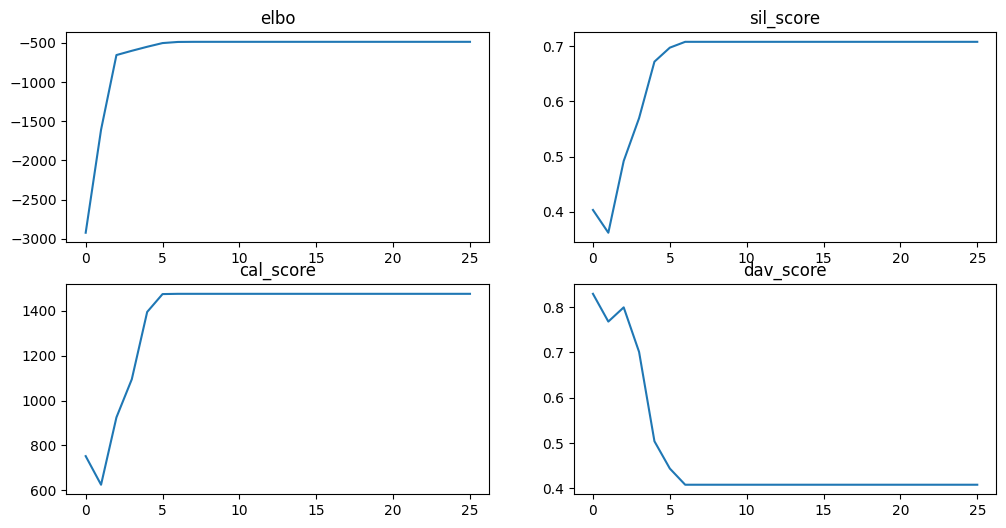

In [2]:
from scipy.special import digamma, gammaln

# Init.
# NOTE: phi = 1/K -> no symmetry breaking, nothing learned
r = np.random.random((N, K))
phi = r / r.sum(axis=-1, keepdims=True)

# VI.
fig, ax = plt.subplots()
frames = []

metrics = MetricsLogger()
early_stopping = EarlyStopping(patience=10)
while (not early_stopping.converged()):
    # gamma.
    s_phi = phi.sum(axis=0)
    gamma = 1 + s_phi

    # m, sigma.
    sigma = 1 / (0.1 + s_phi)
    m = (x[:, None, :] * phi[:, :, None]).sum(axis=0) * sigma[:, None]

    # phi.
    dist = ((x[:, None, :] - m) ** 2).sum(axis=-1)
    dg = digamma(gamma)
    l = dg - (0.5 * dist)
    l = l - l.max(axis=-1, keepdims=True)
    exp_l = np.exp(l)
    phi = exp_l / exp_l.sum(axis=-1, keepdims=True)

    # plot.
    z = phi.argmax(axis=-1)
    frames.append(plot_clusters(x, z, m, ax))

    # elbo.
    p_mu = (-0.05 * (10 + (m**2).sum(axis=-1)).sum())
    gamma_sum = gamma.sum()
    dg_sum = digamma(gamma_sum)
    p_z = (phi * ((-0.5 * dist) + dg - dg_sum)).sum()
    likelihood = p_mu + p_z

    pi_ent = gammaln(gamma).sum() - gammaln(gamma_sum) + ((gamma_sum - K) * dg_sum) - ((gamma - 1) * dg).sum()
    mu_ent = 0.5 * np.log(sigma).sum()
    z_ent = -(phi * np.log(phi)).sum()
    entropy = pi_ent + mu_ent + z_ent

    elbo = likelihood + entropy

    # log metrics.
    step_metrics = {"elbo": elbo}
    step_metrics.update(eval_clusters(x, z))
    metrics.log(step_metrics)
    early_stopping.update(-elbo)


anim = ArtistAnimation(fig, frames, interval=300, blit=True)
display(HTML(anim.to_jshtml()))
plt.close(fig)

metrics.plot()